# 1) Matplotlib Styles

For this case study, we'll use the `fivethirtyeight` style to build this graph.

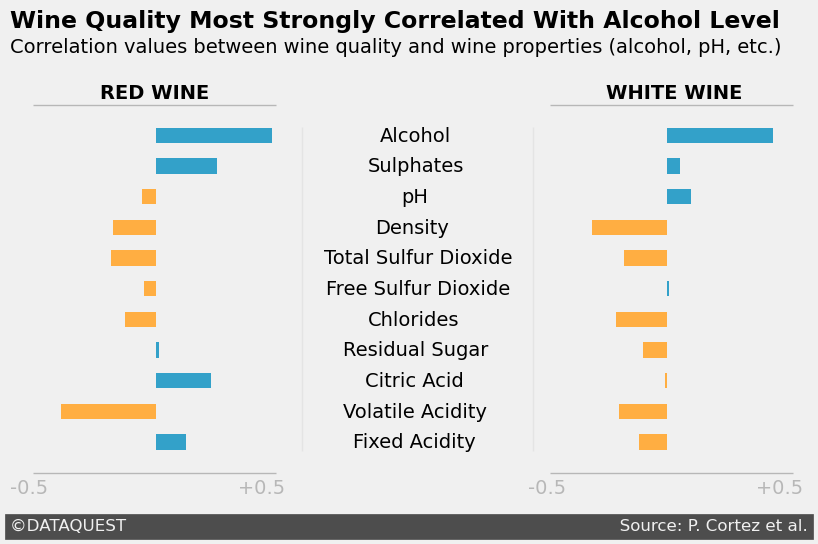

Matplotlib's pre-defined styles change the default visual properties of graphs. Below, we create a line plot using the `Solarize_Light2` style. To do that, we import the `matplotlib.style` submodule and then use the `style.use()` function.

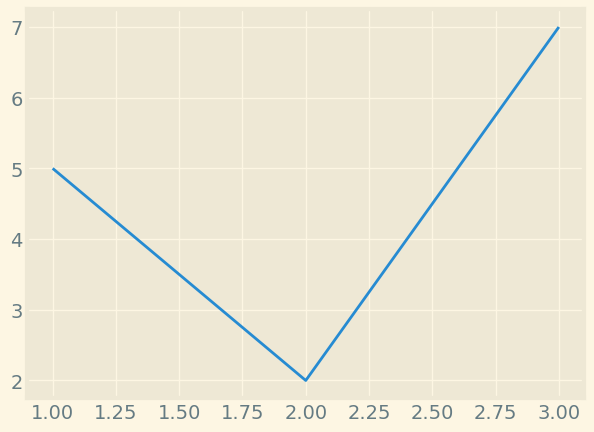

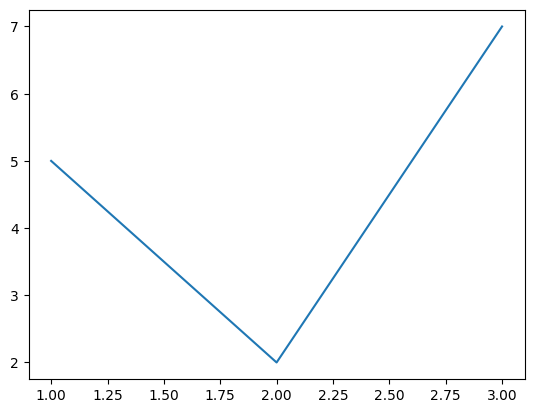

In [4]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('Solarize_Light2')
plt.plot([1, 2, 3], [5, 2, 7])
plt.show()

#back to default style
style.use('default')
plt.plot([1, 2, 3], [5, 2, 7])
plt.show()

We can see all the available styles by accessing the `style.available` attribute.

If you want to switch between different styles, use `style.use('default')` **between** each change — some of the styles can interfere with one another.

In [5]:
print(style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Instructions

1. Create a line plot using the `ggplot` style.

    * The x-coordinates are [2, 4, 6].
    * The y-coordinates are [10, 15, 5].
    * Close and display the plot using p`lt.show()`.

1. Create a line plot using the `default` style.
    * The coordinates are the same as above.
    * Close and display the plot using plt.show().

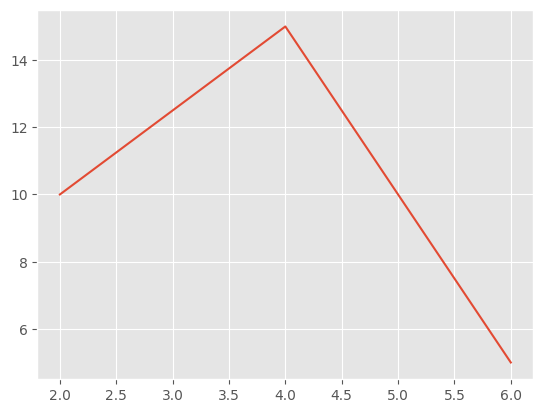

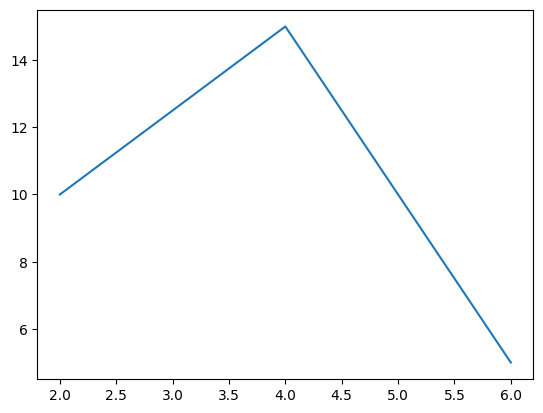

In [6]:
style.use('ggplot')
plt.plot([2, 4, 6], [10, 15, 5])
plt.show()

style.use('default')
plt.plot([2, 4, 6], [10, 15, 5])
plt.show()

# 2) Wine Quality Dataset

We're going to use a dataset on wine quality. Researchers P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. collected this data for their [research paper](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377). We can find documentation and download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality).

The data comes in the form of two files:

* `winequality-red.csv:` data for red wine.
* `winequality-white.csv:` data for white wine.

Below, we see the first five rows of the `winequality-red.csv` file:

In [7]:
import pandas as pd
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We want to determine which attributes (pH, alcohol level, etc.) most strongly correlate with wine `quality`. Below, we see the correlation values between quality and the other columns 

In [8]:
red_corr = red_wine.corr()['quality'][:-1]
print(red_corr)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


Red wine `quality` most strongly correlates with `alcohol` level and `volatile` acidity. If you're curious, you can find information on the Internet on each wine property. In this [article](https://extension.psu.edu/volatile-acidity-in-wine), for instance, we see that volatile acidity contributes to the smell and taste of vinegar in wine.

Let's now calculate correlations for the white wine dataset.

## Instructions

1. Read in the `winequality-white.csv` file into a pandas DataFrame.
    * Use `sep=';'` to properly read the file.
    * Assign the result to `white_wine`.

1. Calculate the correlation between `quality` and the other columns of `white_wine`.
    * The result should be a pandas Series with the same structure as the Series resulted from `red_wine.corr()['quality'][:-1]`.
    * Assign the correlation values to `white_corr`.

1. Examine the correlation values — what are the strongest two correlations? How does this compare to the red wine values?


In [9]:
import pandas as pd
white_wine = pd.read_csv('winequality-white.csv', sep=';')
white_wine.head()

white_corr = white_wine.corr()['quality'][:-1]

white_corr


fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

# 3) FiveThirtyEight Style

Previously, we calculated the correlation values between wine quality and wine properties. We want to represent these values visually in the form of two `bar plots`. Below, you can see what we want to build.

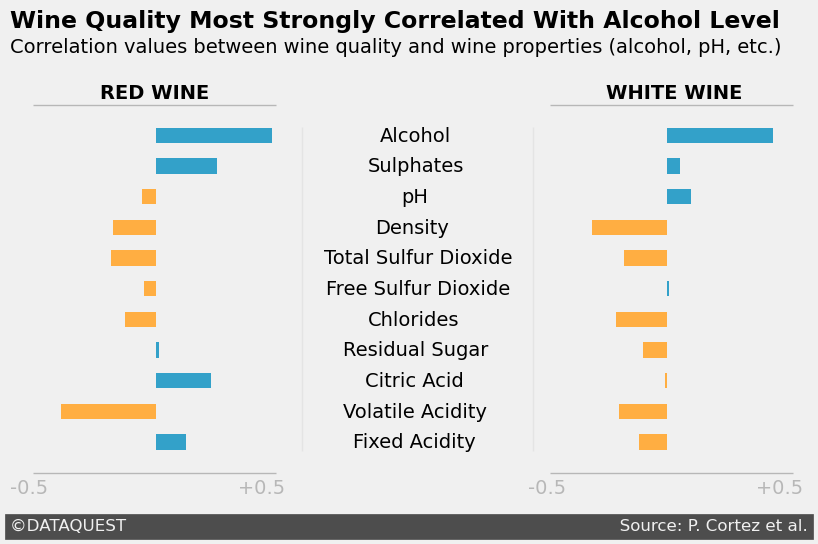

Let's start by creating the two bar plots using the `fivethirtyeight` style.

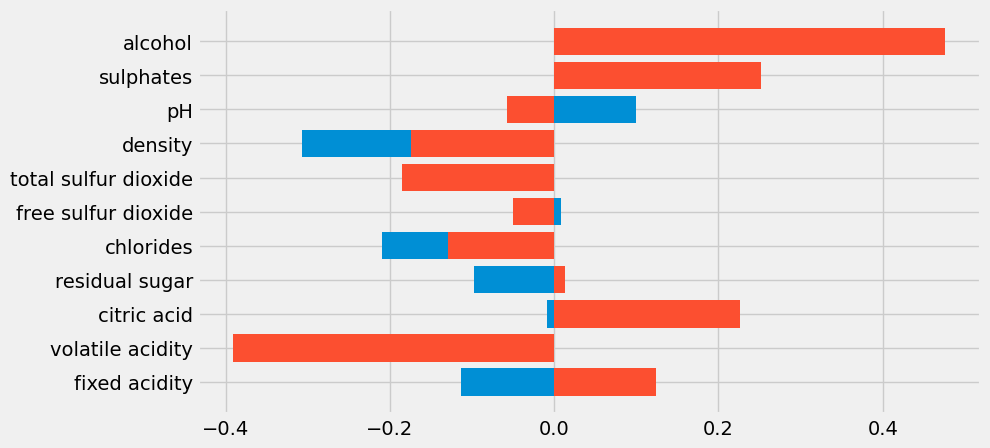

In [10]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr)
ax.barh(red_corr.index, red_corr)
plt.show()

We can tell from the two colors that Matplotlib built **two different bar plots**. It's not clear which is which, though.

To separate them, we're going to move the **white wine plot** to the **right side** of the graph. To do that, we can use the `left` parameter of the `Axes.barh()` method.

This parameter moves the left sides of the bars from their default x-coordinate of `0`. In our case, `left=2` moves them from 0 to 2 (for bars representing negative quantities, the right sides move from 0 to 2).

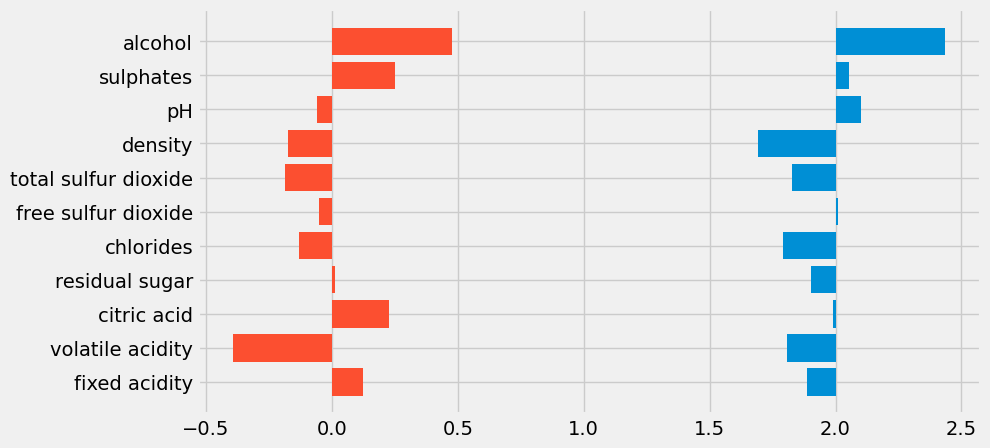

In [11]:
# Assume the other code is written
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2)
ax.barh(red_corr.index, red_corr)
plt.show()

Based on the principle of **proximity**, we now see two different bar plots: the **red wine** plot on the `left` (red-colored), and the **white wine** plot on the `right` (blue-colored).

To maximize the data-ink ratio, let's now erase the following:

* Non-data ink
* Redundant data ink

## Instructions

1. Remove the grid of the graph using the `Axes.grid()` method. Read the documentation to find the parameter you need to use.

1. Remove the x- and y-tick labels. Use the `Axes.set_xticks()` method and the `Axes.set_yticks()` method.

1. Reduce the width of each bar to 0.5 by using the `Axes.barh()` method — you'll need to use the height parameter.

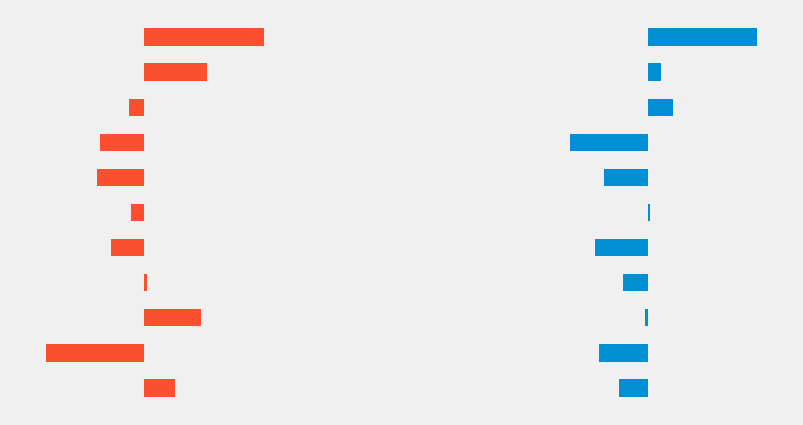

In [ ]:
# Assume the other code is written
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2,height=0.5) #reduce height
ax.barh(red_corr.index, red_corr, height=0.5)# reduce height
ax.grid(visible=False) #remove grid
ax.set_xticks([]) #remove x ticks
ax.set_yticks([]) #remove y ticks
plt.show()

# 8) Adding Y-tick labels

We begin by adding y-tick labels in the center of the graph — both bar plots have the same y-tick labels. Below, we add the labels using `Axes.text()` and specify the coordinates manually. This can be a bit cumbersome, but it also gives us the precision and flexibility we need.

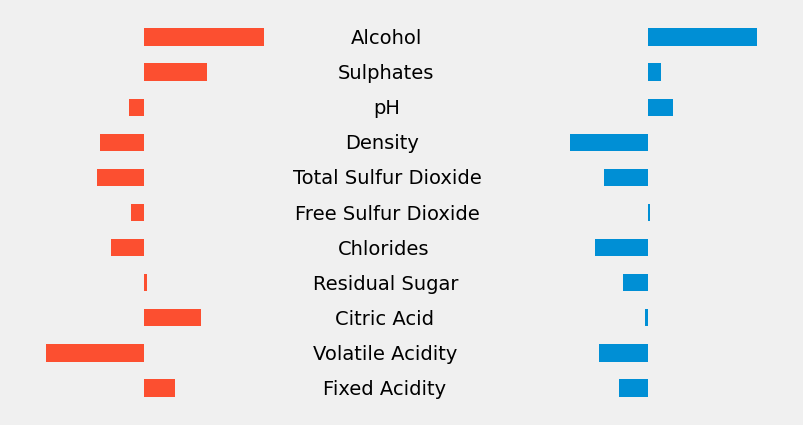

In [18]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2,height=0.5) #reduce height
ax.barh(red_corr.index, red_corr, height=0.5)# reduce height
ax.grid(visible=False) #remove grid
ax.set_xticks([]) #remove x ticks
ax.set_yticks([]) #remove y ticks

# Assume the rest of the code is written
x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
    
plt.show()

To create more space between the labels and each bar plot, we'll move the red wine bar plot a little to the left. We'll use `left=-0.1` — this moves the x-coordinate of the left sides of the bars from 0 to -0.1.

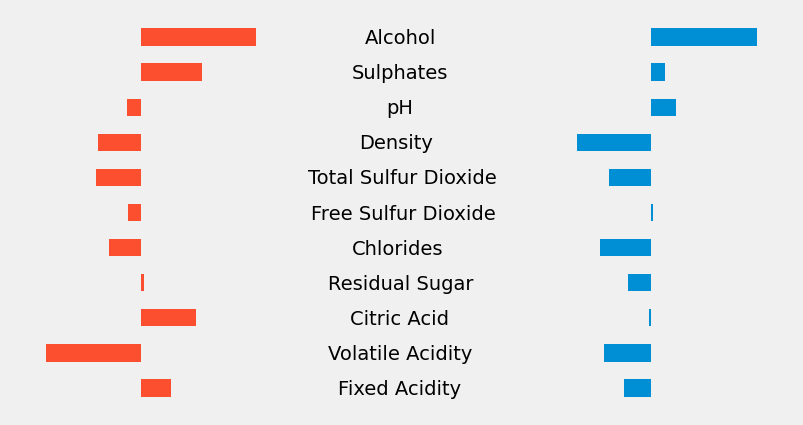

In [ ]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2,height=0.5) 
# Assume the rest of the code is written
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1) #move to the left
ax.grid(visible=False) 
ax.set_xticks([]) 
ax.set_yticks([]) 


x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1

plt.show()

To visually separate the labels from the bar plots, we're going to add two vertical lines — one to the **left** of the labels column, and the other to the **right**,

## Instructions

1. Add a vertical line to the left of the labels column. The line should have the following properties:

    * The x-coordinate is `0.5`.
    * The color is `grey`.
    * The alpha value is `0.1`.
    * The line width is `1`.
    * The ymin is `0.1` and the ymax is `0.9`.

1. Add a vertical line to the right of the labels column. The line should have the following properties:

    * The x-coordinate is 1.45.
    * The color is grey.
    * The alpha value is 0.1.
    * The line width is 1.
    * The ymin is 0.1 and the ymax is 0.9.

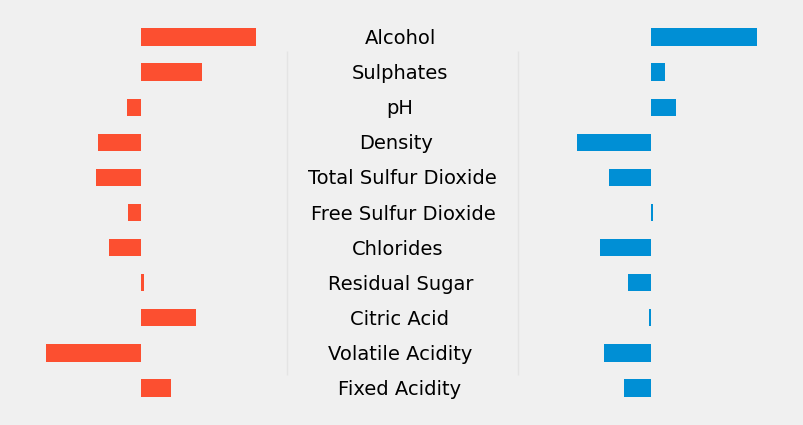

In [26]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2,height=0.5) 
# Assume the rest of the code is written
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1) #move to the left
ax.axvline(x=0.5 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line
ax.axvline(x=1.45 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line
ax.grid(visible=False) 
ax.set_xticks([]) 
ax.set_yticks([]) 


x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1

plt.show()

# 5) Adding X-tick labels

Now, we need to add **x-tick** labels so the audience can read the correlation values.

To do that, we're going to add a **horizontal** line under each bar plot. Note that we control the position of the lines along the x-axis through the `xmin` and the `xmax` parameters.

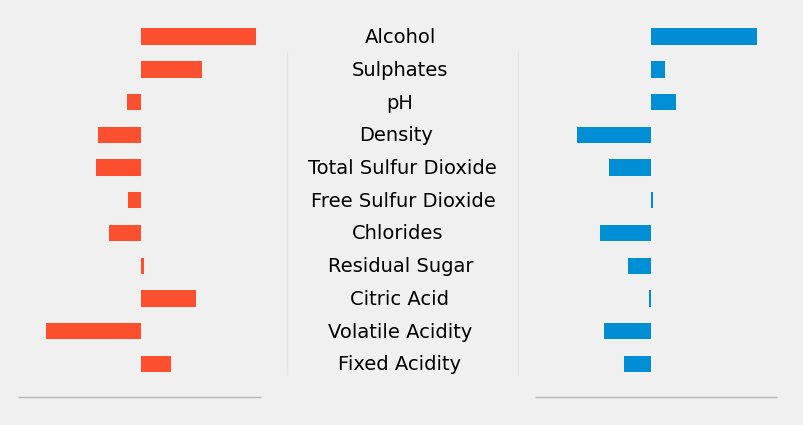

In [27]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2,height=0.5) 
# Assume the rest of the code is written
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1) #move to the left
ax.axvline(x=0.5 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line
ax.axvline(x=1.45 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line

# Assume the rest of the code is written
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
           xmin=0.67, xmax=0.98)


ax.grid(visible=False) 
ax.set_xticks([]) 
ax.set_yticks([]) 


x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1

plt.show()



All correlations range between `-0.5` and `+0.5`, and we're going to use these two values as extremes. 

We're going to add these values as x-tick labels under each horizontal line. Below, note that we also use string concatenation (and `' '*31 means 31 space characters`).

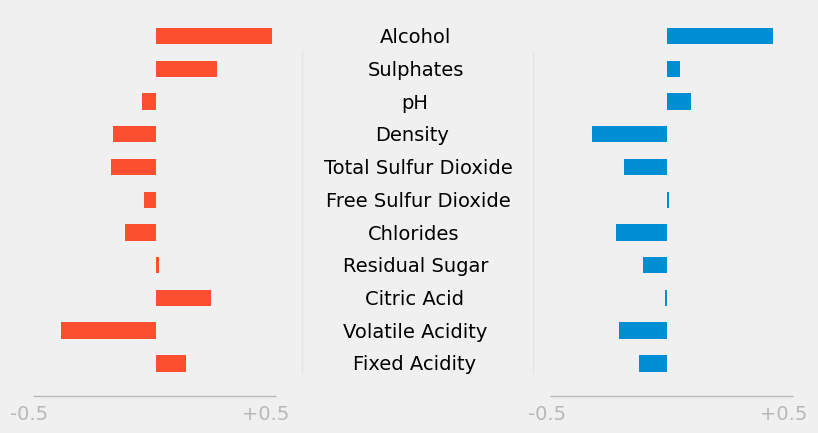

In [29]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2,height=0.5) 
# Assume the rest of the code is written
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1) #move to the left
ax.axvline(x=0.5 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line
ax.axvline(x=1.45 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
           xmin=0.67, xmax=0.98)

# Assume the rest of the code is written
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)


ax.grid(visible=False) 
ax.set_xticks([]) 
ax.set_yticks([]) 


x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1

plt.show()



Now, we're going to add a **title** to each bar plot to show which is the plot for red wine and which is the other. To do that, we're going to draw a **horizontal** line above each plot. Then, we'll write "`RED WINE`" and "`WHITE WINE`" respectively above the horizontal lines

## Instructions

1. Add a horizontal line above the red bar plot. The line should have the following properties:

* The y-coordinate is 11.
* The color is grey.
* The line width is 1.
* The alpha value is 0.5.
* The xmin is 0.01, and the xmax is 0.32.

1. Add the text RED WINE above the horizontal line you've just built. The text should have the following properties:

* Its coordinates are -0.33 (x) and 11.2 (y).
* It's bolded.
* Add a horizontal line above the blue bar plot. The line should have the following properties:

* The y-coordinate is 11.
* The color is grey.
* The line width is 1.
* The alpha value is 0.5.
* The xmin is 0.67, and the xmax is 0.98.

1. Add the text WHITE WINE above the horizontal line you've just built. The text should have the following properties:

* Its coordinates are 1.75 (x) and 11.2 (y).
* It's bolded.

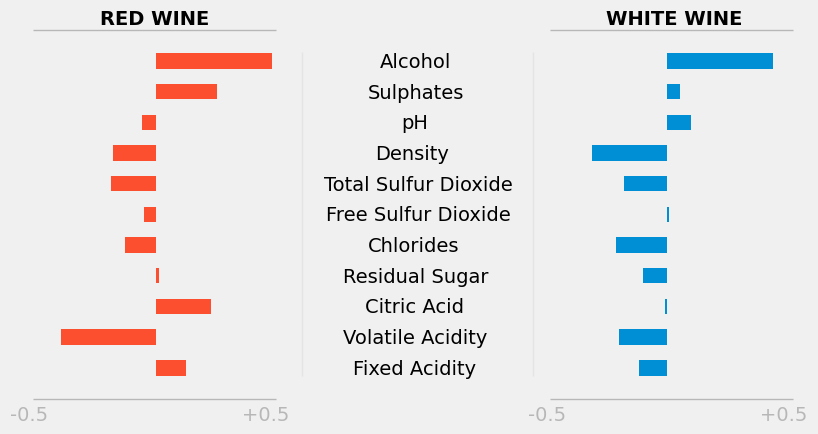

In [34]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
#title left
ax.axhline(11 , color='grey', alpha=0.5,linewidth=1,xmin=0.01,xmax=0.32) #add left vertical line
ax.text(-0.33,11.2, "RED WINE",fontweight='bold')

#title right
ax.axhline(11 , color='grey', alpha=0.5,linewidth=1,xmin=0.67,xmax=0.98) #add right vertical line
ax.text(1.75,11.2, "WHITE WINE",fontweight='bold')

ax.barh(white_corr.index, white_corr, left=2,height=0.5) 
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1) #move to the left

ax.axvline(x=0.5 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line
ax.axvline(x=1.45 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line

ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,xmin=0.01, xmax=0.32) #ADD horizontal line
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,xmin=0.67, xmax=0.98) #ADD horizontal line
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)


ax.grid(visible=False) 
ax.set_xticks([]) 
ax.set_yticks([]) 


x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1

plt.show()


# 6) Adding a Signature

FiveThirtyEight graphs generally have a signature bar at the bottom, where we see the creator's name and the data source.

One way to draw a signature bar is to add text with a dark background color. Below, we add the text ``©DATAQUEST Source: P. Cortez et al``. with a background color of `#4d4d4d` (a shade of grey). The text itself has the color `#f0f0f0`, which is the same as the graph's background color.

To create the visual effect of a signature, we need to add more white space between `©DATAQUEST` and Source: `P. Cortez et al`.. We can use multiplication to add multiple white spaces — `' '*94` adds 94 white spaces.

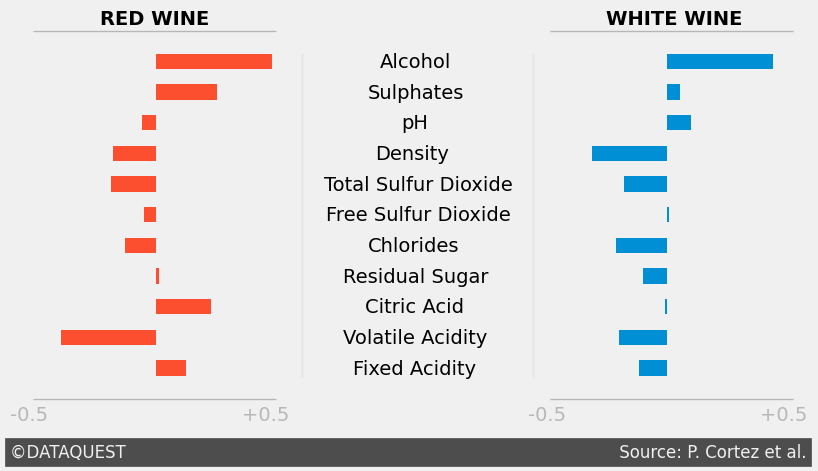

In [35]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
#title left
ax.axhline(11 , color='grey', alpha=0.5,linewidth=1,xmin=0.01,xmax=0.32) #add left vertical line
ax.text(-0.33,11.2, "RED WINE",fontweight='bold')

#title right
ax.axhline(11 , color='grey', alpha=0.5,linewidth=1,xmin=0.67,xmax=0.98) #add right vertical line
ax.text(1.75,11.2, "WHITE WINE",fontweight='bold')

ax.barh(white_corr.index, white_corr, left=2,height=0.5) 
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1) #move to the left

ax.axvline(x=0.5 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line
ax.axvline(x=1.45 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line

ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,xmin=0.01, xmax=0.32) #ADD horizontal line
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,xmin=0.67, xmax=0.98) #ADD horizontal line
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)


ax.grid(visible=False) 
ax.set_xticks([]) 
ax.set_yticks([]) 


x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
    
# Assume the rest of the code is written
ax.text(-0.7, -2.9,
        '©DATAQUEST' + ' '*94 + 'Source: P. Cortez et al.',
        color = '#f0f0f0',
        backgroundcolor = '#4d4d4d',
        fontsize=12)

plt.show()



Note that we perceive the creator's name and the data source as grouped together. They are part of the same group (part of the signature) thanks to the **enclosure** we create with the dark grey rectangle.

Let's now add a title and a subtitle to our graph. To maximize data-ink, we're going to do the following:

* We'll use the title to show data.
* We'll use the subtitle to explain the numerical values.

## Instructions

1. Add the title Wine Quality Most Strongly Correlated With Alcohol Level. The title should have the following properties:
    * Its coordinates are -0.7 (x) and 13.5 (y).
    * The font size is 17.
    * It's bolded.

1. Add the subtitle Correlation values between wine quality and wine properties (alcohol, pH, etc.). Its coordinates are -0.7 (x) and 12.7 (y). Leave the font size on default.


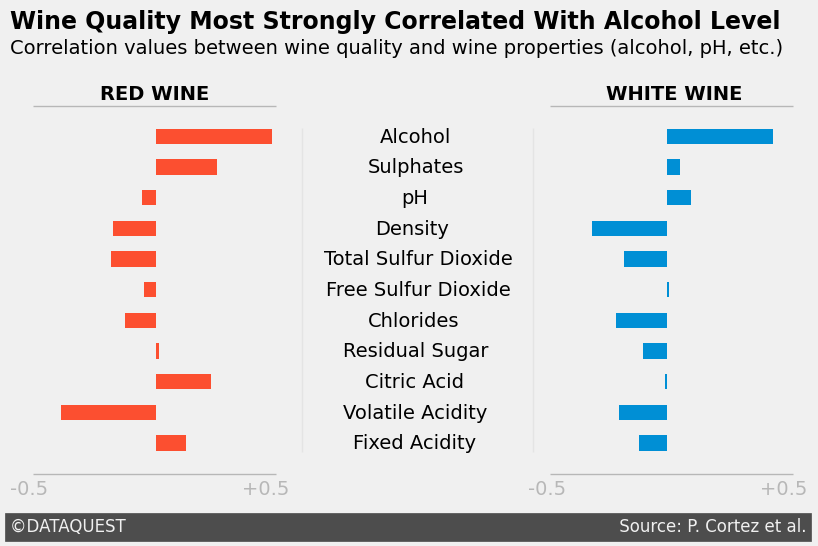

In [36]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))

#main title
ax.text(-0.7, 13.5, 'Wine Quality Most Strongly Correlated With Alcohol Level',fontsize=17, fontweight='bold')
#main subtitle
ax.text(-0.7, 12.7, 'Correlation values between wine quality and wine properties (alcohol, pH, etc.)')
#title left
ax.axhline(11 , color='grey', alpha=0.5,linewidth=1,xmin=0.01,xmax=0.32) #add left vertical line
ax.text(-0.33,11.2, "RED WINE",fontweight='bold')

#title right
ax.axhline(11 , color='grey', alpha=0.5,linewidth=1,xmin=0.67,xmax=0.98) #add right vertical line
ax.text(1.75,11.2, "WHITE WINE",fontweight='bold')

ax.barh(white_corr.index, white_corr, left=2,height=0.5) 
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1) #move to the left

ax.axvline(x=0.5 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line
ax.axvline(x=1.45 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line

ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,xmin=0.01, xmax=0.32) #ADD horizontal line
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,xmin=0.67, xmax=0.98) #ADD horizontal line
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)


ax.grid(visible=False) 
ax.set_xticks([]) 
ax.set_yticks([]) 


x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
    
# Assume the rest of the code is written
ax.text(-0.7, -2.9,
        '©DATAQUEST' + ' '*94 + 'Source: P. Cortez et al.',
        color = '#f0f0f0',
        backgroundcolor = '#4d4d4d',
        fontsize=12)

plt.show()


# 7) Coloring Bars differently

The last change we're going to make to our graph is the bar colors:

* Positive correlation values will take the color `#33A1C9 `(a tint of blue).
* Negative correlation values will take the color `#ffae42` (a tint of orange).

To make this change, we'll use the `color` parameter of `Axes.barh()`. So far, we've only used strings with this parameter: '`blue`', '`red`', '#`af0b1e`', etc.

The `color` parameter, however, can also take in an array of strings, where each string represents a color. Below, we use a Python `list` to specify the colors for four bars — note that Matplotlib preserves the order of colors in the list:

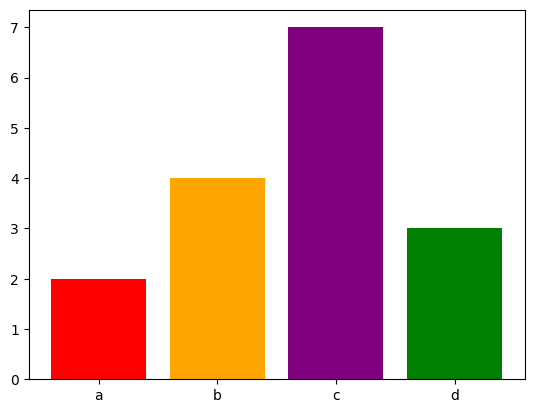

In [38]:
style.use('default')
colors = ['red', 'orange', 'purple', 'green']
plt.bar(['a', 'b', 'c', 'd'], [2, 4, 7, 3],
        color=colors)
plt.show()

For our data, it can get cumbersome to manually add the color code for each correlation value. We're going to simplify this using `pandas` — below are the steps for the white wine data set:

* We calculate the correlations between `quality` and the other columns.
* We create a Boolean vector where zero and *positive* correlation values are mapped to `True`, and **negative** values are mapped to `False`.
* We map each Boolean value to a string representing a color code: True to '`#33A1C9'`, and False to '`#ffae42'`.

In [39]:
white_corr = white_wine.corr()['quality'][:-1]
positive_white = white_corr >= 0
color_map_white = positive_white.map({True:'#33A1C9',
                                      False:'#ffae42'}
                                    )
print(color_map_white)

fixed acidity           #ffae42
volatile acidity        #ffae42
citric acid             #ffae42
residual sugar          #ffae42
chlorides               #ffae42
free sulfur dioxide     #33A1C9
total sulfur dioxide    #ffae42
density                 #ffae42
pH                      #33A1C9
sulphates               #33A1C9
alcohol                 #33A1C9
Name: quality, dtype: object


A pandas `Series` is also an array, which means we can pass `color_map_white` to the `color` parameter.



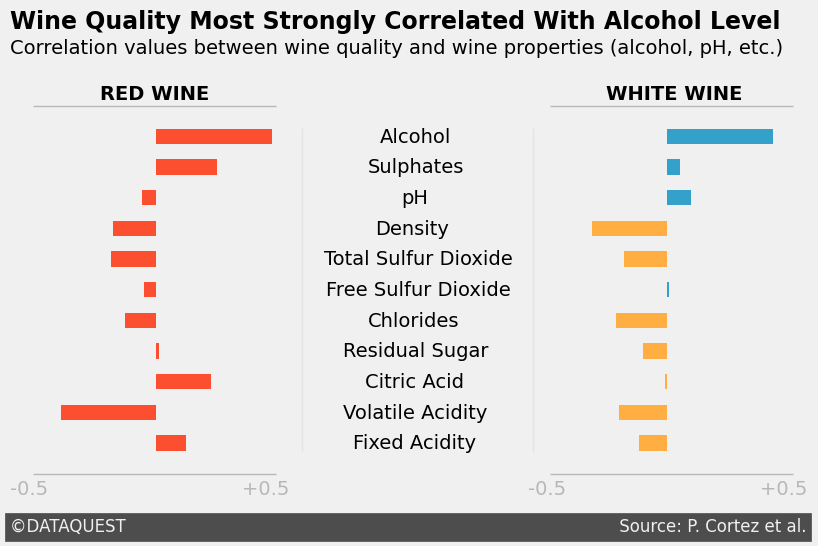

In [40]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))

#main title
ax.text(-0.7, 13.5, 'Wine Quality Most Strongly Correlated With Alcohol Level',fontsize=17, fontweight='bold')
#main subtitle
ax.text(-0.7, 12.7, 'Correlation values between wine quality and wine properties (alcohol, pH, etc.)')
#title left
ax.axhline(11 , color='grey', alpha=0.5,linewidth=1,xmin=0.01,xmax=0.32) #add left vertical line
ax.text(-0.33,11.2, "RED WINE",fontweight='bold')

#title right
ax.axhline(11 , color='grey', alpha=0.5,linewidth=1,xmin=0.67,xmax=0.98) #add right vertical line
ax.text(1.75,11.2, "WHITE WINE",fontweight='bold')

ax.barh(white_corr.index, white_corr, left=2,height=0.5) 
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1) #move to the left

ax.axvline(x=0.5 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line
ax.axvline(x=1.45 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line

ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,xmin=0.01, xmax=0.32) #ADD horizontal line
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,xmin=0.67, xmax=0.98) #ADD horizontal line
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)


ax.grid(visible=False) 
ax.set_xticks([]) 
ax.set_yticks([]) 


x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
    
# Assume the rest of the code is written
ax.text(-0.7, -2.9,
        '©DATAQUEST' + ' '*94 + 'Source: P. Cortez et al.',
        color = '#f0f0f0',
        backgroundcolor = '#4d4d4d',
        fontsize=12)

# Assume the rest of the code is written
ax.barh(white_corr.index, white_corr, color=color_map_white,
         height=0.5, left=2)

plt.show()



Now, let's follow the same steps for the `red wine` bar plot.

## Instructions

1. Create a pandas `Series` for the red wine data set to specify the color order.

    * The correlation values are already saved in `red_corr`.
    * Zero and positive correlation values should have the color code '`#33A1C9`'.
    * Negative correlation values should have the color code '`#ffae42`'.

1. Use the `Series` you've just created to change the colors of the bars in the red wine bar plot.

In [42]:
red_corr = red_wine.corr()['quality'][:-1]
positive_red = red_corr >= 0
color_map_red = positive_red.map({True:'#33A1C9',
                                      False:'#ffae42'}
                                    )
print(color_map_red)

fixed acidity           #33A1C9
volatile acidity        #ffae42
citric acid             #33A1C9
residual sugar          #33A1C9
chlorides               #ffae42
free sulfur dioxide     #ffae42
total sulfur dioxide    #ffae42
density                 #ffae42
pH                      #ffae42
sulphates               #33A1C9
alcohol                 #33A1C9
Name: quality, dtype: object


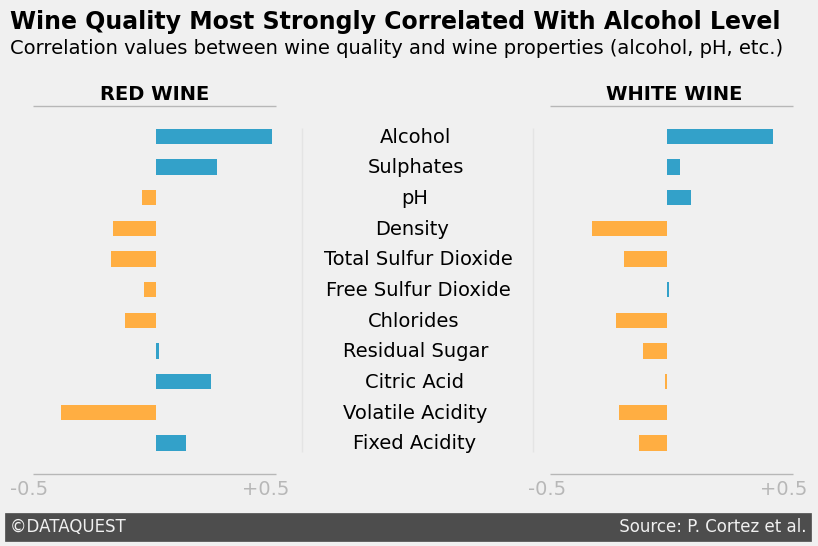

In [45]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))

#main title
ax.text(-0.7, 13.5, 'Wine Quality Most Strongly Correlated With Alcohol Level',fontsize=17, fontweight='bold')
#main subtitle
ax.text(-0.7, 12.7, 'Correlation values between wine quality and wine properties (alcohol, pH, etc.)')
#title left
ax.axhline(11 , color='grey', alpha=0.5,linewidth=1,xmin=0.01,xmax=0.32) #add left vertical line
ax.text(-0.33,11.2, "RED WINE",fontweight='bold')

#title right
ax.axhline(11 , color='grey', alpha=0.5,linewidth=1,xmin=0.67,xmax=0.98) #add right vertical line
ax.text(1.75,11.2, "WHITE WINE",fontweight='bold')

ax.barh(white_corr.index, white_corr, left=2,height=0.5,color=color_map_white) #change color
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1,color=color_map_red) #change color

ax.axvline(x=0.5 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line
ax.axvline(x=1.45 , color='grey', alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9) #add vertical line

ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,xmin=0.01, xmax=0.32) #ADD horizontal line
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,xmin=0.67, xmax=0.98) #ADD horizontal line
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)


ax.grid(visible=False) 
ax.set_xticks([]) 
ax.set_yticks([]) 


x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
    

ax.text(-0.7, -2.9,
        '©DATAQUEST' + ' '*94 + 'Source: P. Cortez et al.',
        color = '#f0f0f0',
        backgroundcolor = '#4d4d4d',
        fontsize=12)


plt.show()

